In [4]:
import jupyter_black

jupyter_black.load()

In [5]:
# import kagglehub
# import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(
    "/Users/erikak/Documents/uni/NLP/Fake-News/with_features.csv", index_col=0
)

# Pradinė duomenų apžvalga

In [7]:
df.head()

,title,text,subject,date,label,word_count,stopword_count,punct_count,wierd_symbols_count,ent_count
0,"U.N. rights boss sees possible ""crimes against...",GENEVA (Reuters) - The United Nations human ri...,worldnews,"September 11, 2017",1,460,199,59,1,42
1,Germany: A lot of Brexit work remains even if ...,BERLIN (Reuters) - Germany regards Friday s jo...,worldnews,"December 8, 2017",1,138,62,9,1,18
2,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,19-Feb-18,0,220,110,17,1,11
3,GUESS WHO Predicted Weiner Would “Tell The Wor...,,politics,"Oct 28, 2016",0,0,0,0,1,0
4,Kidnapped Red Cross staff released in Afghanis...,KABUL (Reuters) - Two Red Cross staff members ...,worldnews,"September 5, 2017",1,164,83,19,1,25


In [8]:
df.shape

(44898, 10)

### Trūkstamos vertės duomenyse

In [9]:
df.isna().sum()

title                  0
text                   0
subject                0
date                   0
label                  0
word_count             0
stopword_count         0
punct_count            0
wierd_symbols_count    0
ent_count              0
dtype: int64

### Pasiskirstymas tarp klasių

In [10]:
df.groupby("label").size()

label
0    23481
1    21417
dtype: int64

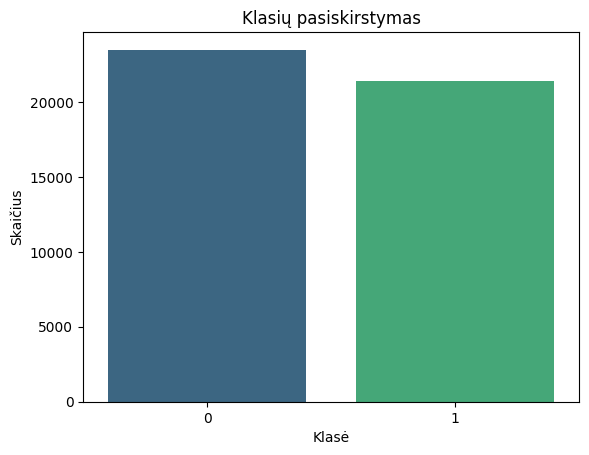

In [11]:
group_sizes = df.groupby("label").size().reset_index(name="count")

# Create a bar plot
sns.barplot(
    x="label", y="count", data=group_sizes, palette="viridis", hue="label", legend=False
)

# Add labels and title
plt.title("Klasių pasiskirstymas")
plt.xlabel("Klasė")
plt.ylabel("Skaičius")

# Show the plot
plt.show()

### Temos (angl. subject) analizė

In [12]:
df["subject"].nunique()

8

In [13]:
group_sizes_subject = (
    df.groupby(["label", "subject"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

group_sizes_subject

,label,subject,count
6,1,politicsNews,11272
7,1,worldnews,10145
2,0,News,9050
5,0,politics,6841
4,0,left-news,4459
0,0,Government News,1570
3,0,US_News,783
1,0,Middle-east,778


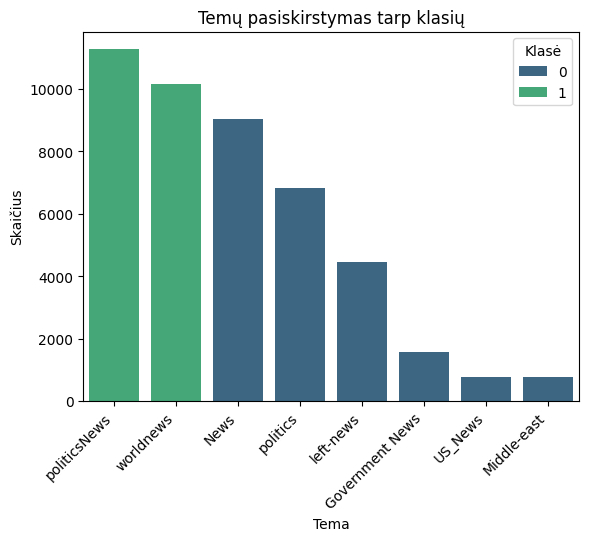

In [14]:
# Create a bar plot
sns.barplot(
    x="subject", y="count", data=group_sizes_subject, palette="viridis", hue="label"
)

# Add labels and title
plt.title("Temų pasiskirstymas tarp klasių")
plt.xlabel("Tema")
plt.ylabel("Skaičius")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Klasė")

# Show the plot
plt.show();

0 - Fake News, 1 - True.

Matome, kad temos tarp klasiu nepersidengia, todel pagal tai klasifikuoti duomenu negalesime.

### Požymių pasiskistymas tarp klasių

In [15]:
df.describe()

,label,word_count,stopword_count,punct_count,wierd_symbols_count,ent_count
count,44898.000000,44898.000000,44898.000000,44898.000000,44898.000000,44898.000000
mean,0.477015,405.282284,187.964965,49.581607,1.730055,45.097621
std,0.499477,351.265595,166.374220,44.992897,1.363114,38.868701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,203.000000,89.000000,23.000000,1.000000,21.000000
50%,0.000000,362.000000,167.000000,42.000000,1.000000,38.000000
75%,1.000000,513.000000,242.000000,63.000000,1.000000,58.000000
max,1.000000,8135.000000,3561.000000,1107.000000,9.000000,804.000000


df.head(2)

#### word_count

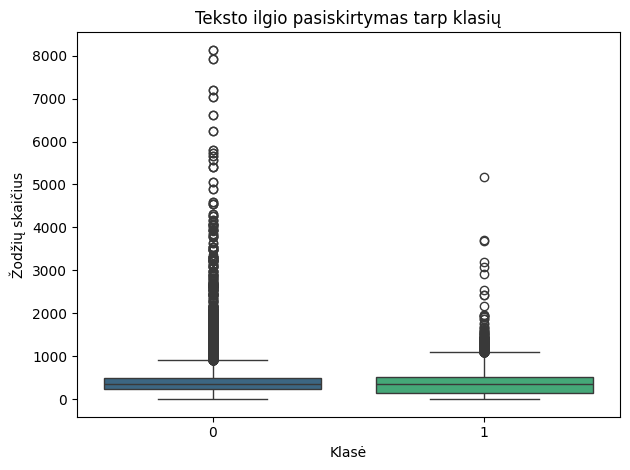

In [16]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label", y="word_count", data=df, palette="viridis", hue="label", legend=False
)

# Customize the plot
plt.title("Teksto ilgio pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Žodžių skaičius")

# Show the plot
plt.tight_layout()
plt.show()

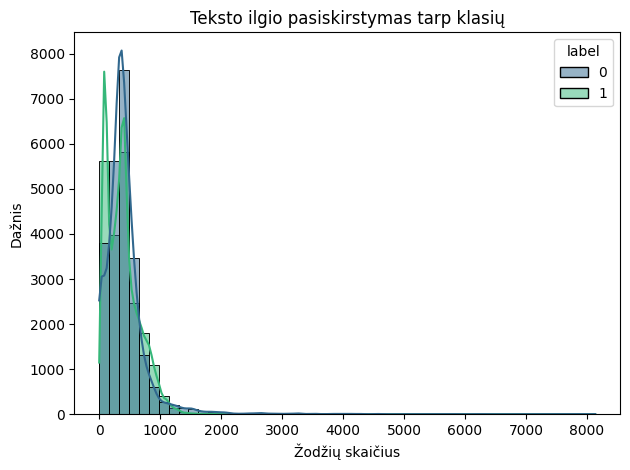

In [17]:
sns.histplot(data=df, x="word_count", hue="label", kde=True, palette="viridis", bins=50)

# Customize the plot
plt.title("Teksto ilgio pasiskirstymas tarp klasių")
plt.xlabel("Žodžių skaičius")
plt.ylabel("Dažnis")

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
df.groupby("label")["word_count"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,23481.0,423.197905,408.388890,0.0,240.0,363.0,506.0,8135.0
1,21417.0,385.640099,274.006204,0.0,148.0,359.0,525.0,5172.0


Pastebėjimai:

1. Vidutiniskai fake tekstai yra ilgesni, taip pat matoma, kad sioje klaseje yra gerokai daugiau ilgo teksto isskirciu.
2. Duomenis be teksto reiketu pasalinti is duomenu rinkinio, t.y. kur word_count = 0.
3. Apskritai teksto ilgis tarp klasių yra panašus -> ar tai bus naudingas feature apmokant modelius?

In [19]:
# tusti tekstai -> pasalinti is analizes
df.loc[df["word_count"] == 0, ["title", "text"]]

,title,text
3,GUESS WHO Predicted Weiner Would “Tell The Wor...,
42,FAKE NEWS ALERT! FORMER GOV OF MARYLAND Calls ...,
210,RAW VIDEO: A SHOCKING TOUR Of The Detroit Ghet...,
418,2009 DUKES OF HAZARD VIDEO EERILY PREDICTS THE...,
654,DEMOCRATS ADMIT PLAN To Commit Mass Voter Frau...,
...,...,...
44562,WHOA! RUSH LIMBAUGH RIPS Into Republicans Who ...,
44589,KAINE GETS TRIPPED UP Trying To Explain Away H...,
44643,TRUTH! Sara Carter is a Gem of a Reporter: “No...,
44644,FANTASTIC! Watch Boeing Employees Chant “USA U...,


In [20]:
df = df.loc[df["word_count"] != 0].copy()  # pasalinu be irasus be teksto

#### stopword_count

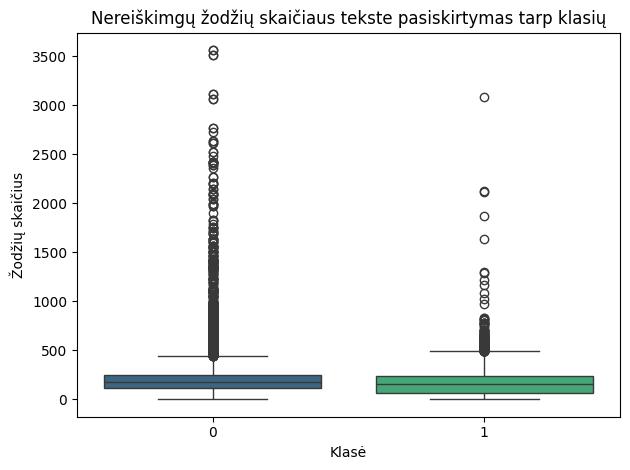

In [21]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label", y="stopword_count", data=df, palette="viridis", hue="label", legend=False
)

# Customize the plot
plt.title("Nereiškimgų žodžių skaičiaus tekste pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Žodžių skaičius")

# Show the plot
plt.tight_layout()
plt.show()

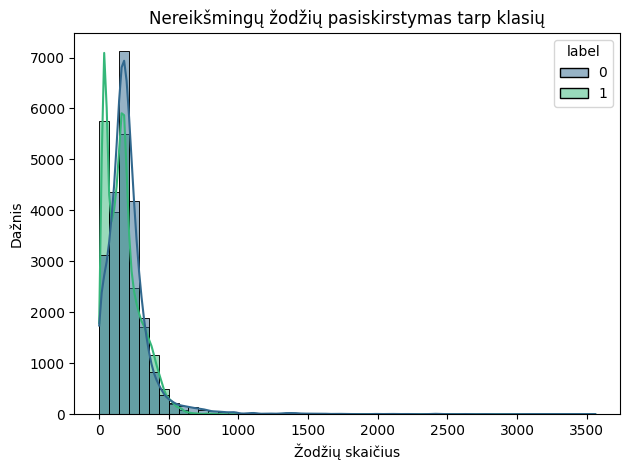

In [22]:
sns.histplot(
    data=df, x="stopword_count", hue="label", kde=True, palette="viridis", bins=50
)

# Customize the plot
plt.title("Nereikšmingų žodžių pasiskirstymas tarp klasių")
plt.xlabel("Žodžių skaičius")
plt.ylabel("Dažnis")

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
df.groupby("label")["stopword_count"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,209.057459,193.133658,0.0,118.0,179.0,249.0,3561.0
1,21416.0,170.997338,128.174645,5.0,64.0,155.0,234.0,3086.0


Pastebėjimai:

1. Pasiskisrtymas tarp klasiu panasus, velgi daugiau isskirciu Fake News klaseje -> galima susieti su teksto ilgiu -> tiesiog count nera reprezentatyvi metrika -> siulymas pereiti prie santykio.

#### stopwords_ratio

In [24]:
df["stopwords_ratio"] = df["stopword_count"] / df["word_count"]

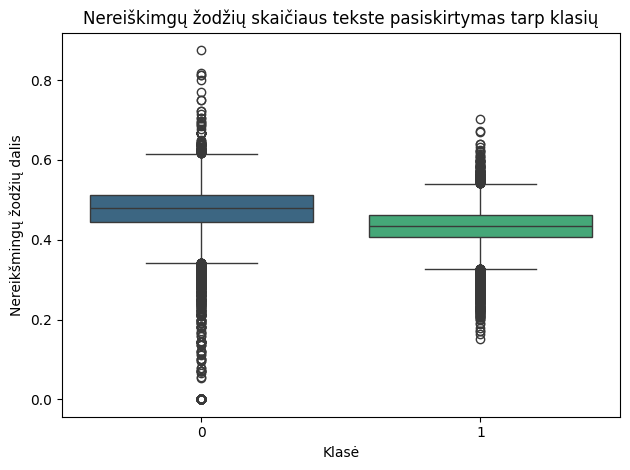

In [25]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label",
    y="stopwords_ratio",
    data=df,
    palette="viridis",
    hue="label",
    legend=False,
)

# Customize the plot
plt.title("Nereiškimgų žodžių skaičiaus tekste pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Nereikšmingų žodžių dalis")

# Show the plot
plt.tight_layout()
plt.show()

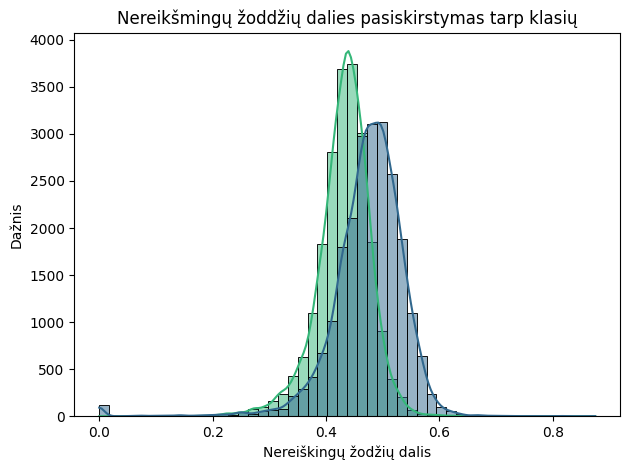

In [26]:
sns.histplot(
    data=df,
    x="stopwords_ratio",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
    legend=False,
)

# Customize the plot
plt.title("Nereikšmingų žoddžių dalies pasiskirstymas tarp klasių")
plt.xlabel("Nereiškingų žodžių dalis")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
df.groupby("label")["stopwords_ratio"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.474067,0.067302,0.000000,0.444772,0.480392,0.513402,0.875000
1,21416.0,0.431580,0.047102,0.151515,0.407583,0.435644,0.460940,0.702315


In [28]:
# nezinau, ar sita dalis reikalinga, just for fun
from scipy import stats

class_0_data = df[df["label"] == 0]["stopwords_ratio"]
class_1_data = df[df["label"] == 1]["stopwords_ratio"]

# H0: vidurkiai lygus
# HA: vidurkiai nelygus


# Perform an independent T-test to compare means of the two classes
t_stat, p_value = stats.ttest_ind(class_0_data, class_1_data)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 76.48102819714505
P-value: 0.0


Pastebėjimai:

1. Nagrinejant nereiksmingu zodziu santyki matomas skirtumas tarp klasiu.
2. Pastebima, kad FakeNews turi didesne dali stopwords.

#### wierd_symbols

In [29]:
df.loc[df["wierd_symbols_count"] != 0].shape

(44176, 11)

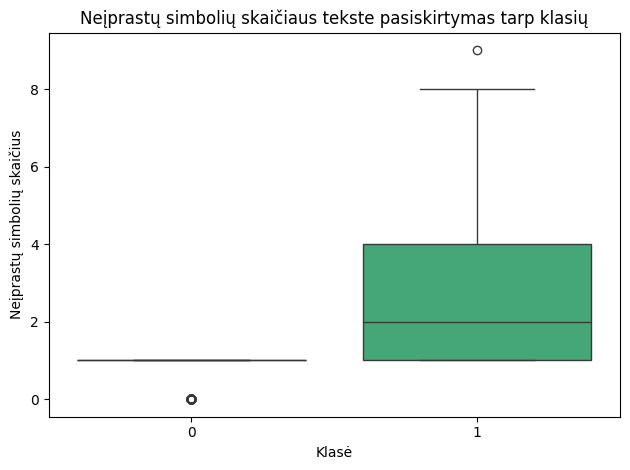

In [30]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label",
    y="wierd_symbols_count",
    data=df,
    palette="viridis",
    hue="label",
    legend=False,
)

# Customize the plot
plt.title("Neįprastų simbolių skaičiaus tekste pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Neįprastų simbolių skaičius")

# Show the plot
plt.tight_layout()
plt.show()

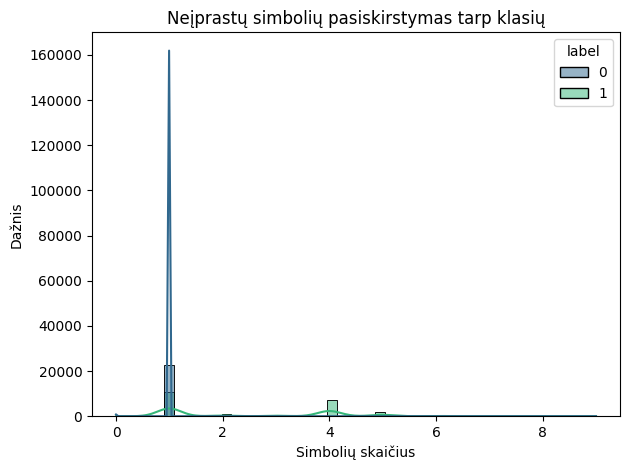

In [33]:
sns.histplot(
    data=df,
    x="wierd_symbols_count",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
)

# Customize the plot
plt.title("Neįprastų simbolių pasiskirstymas tarp klasių")
plt.xlabel("Simbolių skaičius")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

In [32]:
df.groupby("label")["wierd_symbols_count"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.996018,0.062981,0.0,1.0,1.0,1.0,1.0
1,21416.0,2.534787,1.628805,1.0,1.0,2.0,4.0,9.0


Pastebejimai:

1. Dazniau pasitaiko tarp True News klases.
2. Reiketu panagrineti, kas konkreciai cia per simboliai.
3. 

#### punct_ratio

In [36]:
df["punct_ratio"] = df["punct_count"] / df["word_count"]

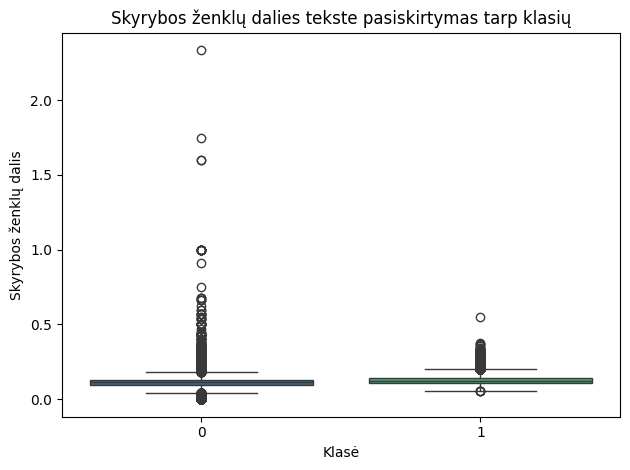

In [38]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label",
    y="punct_ratio",
    data=df,
    palette="viridis",
    hue="label",
    legend=False,
)

# Customize the plot
plt.title("Skyrybos ženklų dalies tekste pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Skyrybos ženklų dalis")

# Show the plot
plt.tight_layout()
plt.show()

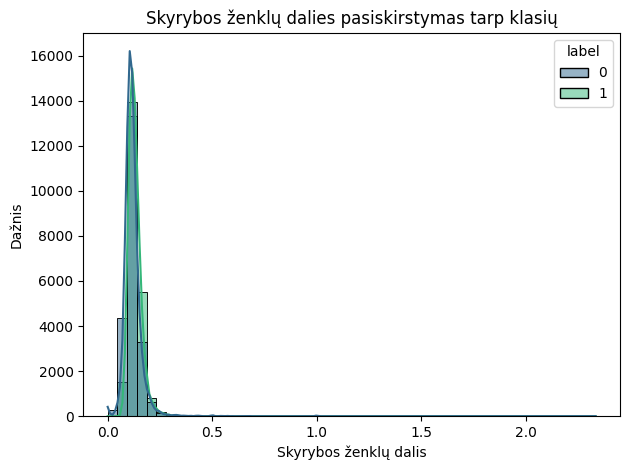

In [41]:
sns.histplot(
    data=df,
    x="punct_ratio",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
)

# Customize the plot
plt.title("Skyrybos ženklų dalies pasiskirstymas tarp klasių")
plt.xlabel("Skyrybos ženklų dalis")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

In [42]:
df.groupby("label")["punct_ratio"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.119072,0.051017,0.000000,0.097071,0.113043,0.132115,2.333333
1,21416.0,0.130227,0.031429,0.052516,0.109205,0.125190,0.145352,0.551095


Pastebejimai:

1. Didesne dalis skyrybos zenklu fake news klaseje. Yra atveju, kai daugiau nei zodziu skyrybos zenklu.
   Matoma, kad tokie irasai yra visai nenaudingi - susideda is vieno zodzio ir pan. Reikia apsvarstyti, koks minimalus zodziu skaicius yra jau skaitomas naudingu tekstu.

In [46]:
df.loc[df["punct_ratio"] >= 1]["text"]

8549                                                Enjoy:
9421                                                Enjoy:
11379                                               Watch:
12143       ***SHARE This HILL-arious video everywhere!***
12710                                              Watch: 
16006                                               Watch:
19012    (function(){ var s=document.createElement('scr...
20258                                               Enjoy:
20284                                                Ouch!
21052                                               Enjoy:
22532                                              Watch: 
30560                                                Ouch!
32418       ***SHARE This HILL-arious video everywhere!***
37669               ***WARNING***This video is GRAPHIC!***
41435                                               Watch:
Name: text, dtype: object

In [48]:
# tekstas irasu trumpesniu nei 10 zodziu, BET gal ideja yra link'u skaiciu imt kaip feature (gali buti count, gali buti boolean)
df.loc[df["word_count"] < 10]["text"]

255      https://www.youtube.com/watch?v=hNPX8ZCIfc0&t=26s
411            https://www.youtube.com/watch?v=aHkNzBRqPCE
456      https://www.youtube.com/watch?time_continue=1&...
583                   How many? I think we ve lost count! 
595            https://www.youtube.com/watch?v=VkRCtn0nEvU
                               ...                        
44299    Trump handles this in a great way! Pretty funny! 
44490      A MUST watch video!https://youtu.be/-5Z-jJ2Z4bU
44517      A MUST watch video!https://youtu.be/-5Z-jJ2Z4bU
44604             Boom!Courtesy of: comicallyincorrect.com
44737              Riiiight just  choose from what works  
Name: text, Length: 236, dtype: object

#### lexical_richness


In [56]:
import pandas as pd


import nltk

nltk.download("punkt")
nltk.download("punkt_tab")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download("punkt")
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))


# Function to calculate lexical richness
def lexical_richness(text):
    # Tokenize the text into words
    tokens = word_tokenize(text.lower())  # Lowercase for uniformity
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Calculate unique words and total words
    unique_words = set(tokens)
    total_words = len(tokens)

    # Calculate lexical richness: unique words / total words
    if total_words > 0:
        return len(unique_words) / total_words
    else:
        return 0

[nltk_data] Downloading package punkt to /Users/erikak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/erikak/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /Users/erikak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/erikak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
df["lexical_richness"] = df["text"].apply(lexical_richness)

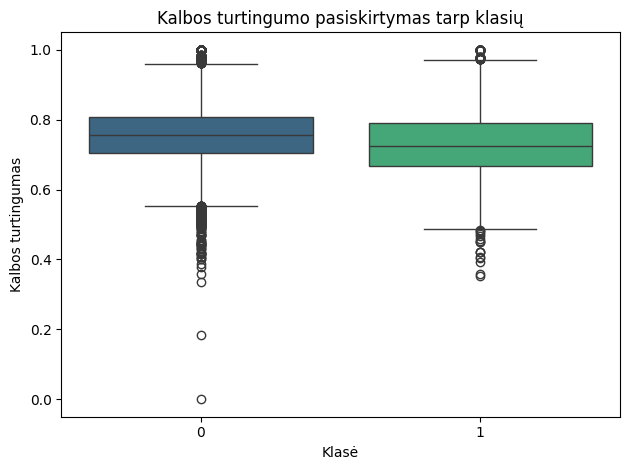

In [59]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label",
    y="lexical_richness",
    data=df,
    palette="viridis",
    hue="label",
    legend=False,
)

# Customize the plot
plt.title("Kalbos turtingumo pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Kalbos turtingumas")

# Show the plot
plt.tight_layout()
plt.show()

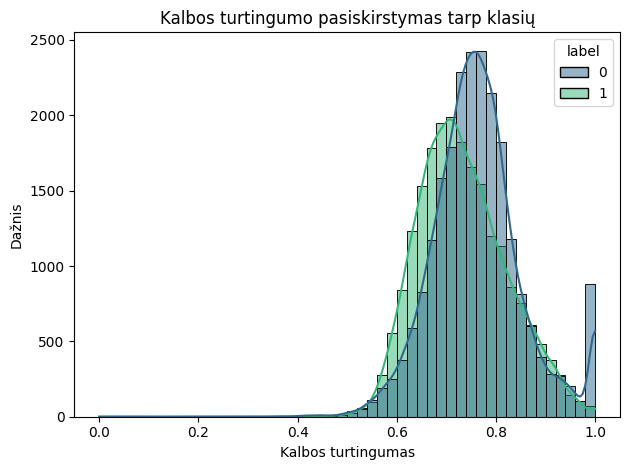

In [61]:
sns.histplot(
    data=df,
    x="lexical_richness",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
)

# Customize the plot
plt.title("Kalbos turtingumo pasiskirstymas tarp klasių")
plt.xlabel("Kalbos turtingumas")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

In [62]:
df.groupby("label")["lexical_richness"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.762061,0.091412,0.000000,0.706100,0.757143,0.807947,1.0
1,21416.0,0.732718,0.089102,0.353479,0.668122,0.723438,0.789916,1.0


In [63]:
class_0_data = df[df["label"] == 0]["lexical_richness"]
class_1_data = df[df["label"] == 1]["lexical_richness"]

# H0: vidurkiai lygus
# HA: vidurkiai nelygus


# Perform an independent T-test to compare means of the two classes
t_stat, p_value = stats.ttest_ind(class_0_data, class_1_data)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 34.1656352157112
P-value: 1.5282357563023486e-252


Pastebejimai:

1. Fake news klase turi didesni turtinguma.
2. Atrodo visai cool feature, bet reikia patikrint ar nekorealiuos su kitais panasiais! pries naudojant modeliui

In [65]:
df.loc[df["lexical_richness"] < 0.1]["text"]

30186    I VE HAD IT! 
Name: text, dtype: object

#### sentiment & subjectivity

In [72]:
import spacy
import pandas as pd
from spacytextblob.spacytextblob import SpacyTextBlob

# Load spaCy model and add spacytextblob pipeline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")


def get_sentiment_subjectivity(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Get sentiment polarity and subjectivity
    sentiment = doc._.blob.polarity  # Sentiment polarity (-1 to 1)
    subjectivity = doc._.blob.subjectivity  # Subjectivity (0 to 1)

    return sentiment, subjectivity

In [73]:
df[["sentiment", "subjectivity"]] = df["text"].apply(
    lambda x: pd.Series(get_sentiment_subjectivity(x))
)

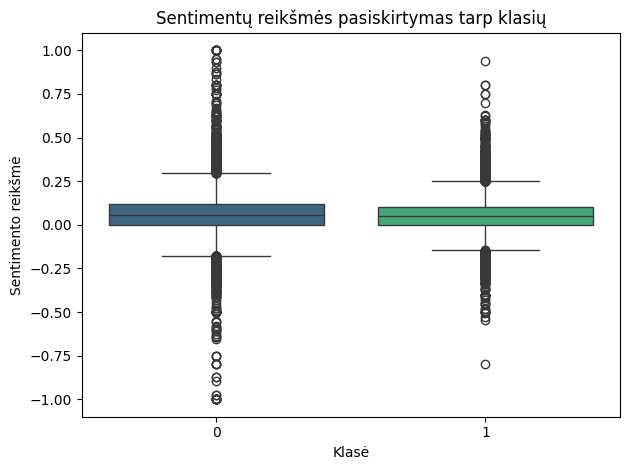

In [78]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label",
    y="sentiment",
    data=df,
    palette="viridis",
    hue="label",
    legend=False,
)

# Customize the plot
plt.title("Sentimentų reikšmės pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Sentimento reikšmė")

# Show the plot
plt.tight_layout()
plt.show()

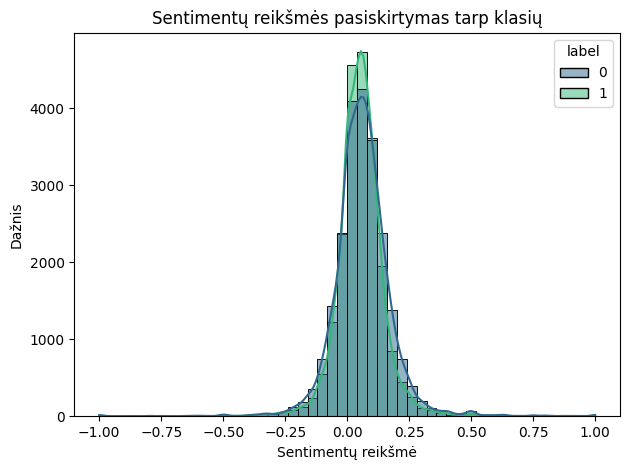

In [79]:
sns.histplot(
    data=df,
    x="sentiment",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
)

# Customize the plot
plt.title("Sentimentų reikšmės pasiskirtymas tarp klasių")
plt.xlabel("Sentimentų reikšmė")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

In [76]:
df.groupby("label")["sentiment"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.061113,0.119482,-1.0,0.000000,0.058333,0.117774,1.0000
1,21416.0,0.053535,0.091853,-0.8,0.001389,0.052197,0.100119,0.9375


Pastebejimai:

1. fake news sentimentu reiksmes pasiskirste daug placiau -> polinkis i krastutinumus?
2. Apskritai vidurkiai panasus.
3. Galbut sentimentu analize/skaiciavima reiketu daryti su tekstu, is kurio jau pasalinti stopwords?

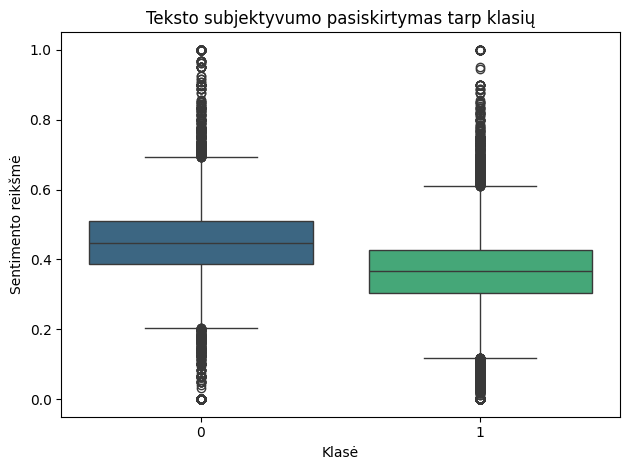

In [80]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label",
    y="subjectivity",
    data=df,
    palette="viridis",
    hue="label",
    legend=False,
)

# Customize the plot
plt.title("Teksto subjektyvumo pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Sentimento reikšmė")

# Show the plot
plt.tight_layout()
plt.show()

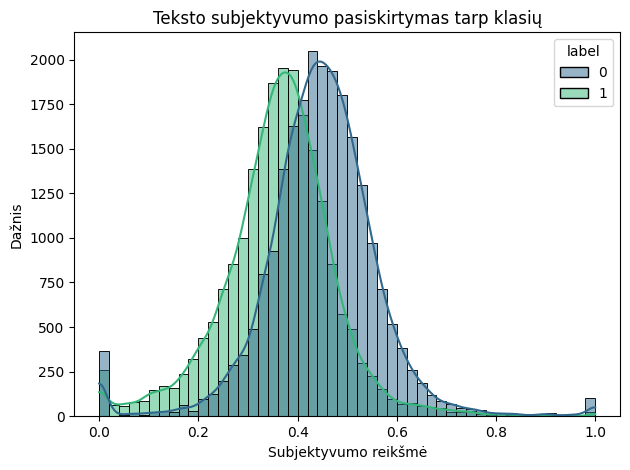

In [83]:
sns.histplot(
    data=df,
    x="subjectivity",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
)

# Customize the plot
plt.title("Teksto subjektyvumo pasiskirtymas tarp klasių")
plt.xlabel("Subjektyvumo reikšmė")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

In [84]:
df.groupby("label")["subjectivity"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.445630,0.119573,0.0,0.386730,0.447787,0.509289,1.0
1,21416.0,0.361724,0.115629,0.0,0.302718,0.367506,0.426021,1.0


Pastebejimai:

1. Fake news turi vidutiniskai aukstesni subjectivity ivertiima, tai reikia kad tekstas yra maziau objektyvus (makes sense).
2. Sita tai pat gal reiketu deti ant teksto, kuris jau be stopwords?
3. Tiek subjectivity tiek sentimentus reikia padaryti ir Title stulpeliui.

#### hashtags, mentions & URLs

In [87]:
import re


def extract_hashtags(text):
    return re.findall(r"#\w+", text)


def extract_mentions(text):
    return re.findall(r"@\w+", text)


def extract_urls(text):
    return re.findall(r"http[s]?://\S+|www\.\S+", text)

In [88]:
df["hashtags"] = df["text"].apply(extract_hashtags)
df["mentions"] = df["text"].apply(extract_mentions)
df["urls"] = df["text"].apply(extract_urls)

In [95]:
unique_hashtags = set([hashtag for sublist in df["hashtags"] for hashtag in sublist])

# Display all unique hashtags
print(unique_hashtags)

{'#DoYouJob', '#GetInFormation', '#russiagate', '#TrumpsArmy', '#LearnToSpell', '#dgaf', '#RESIST', '#tuesdaymotivation', '#DisruptJ20', '#jerrybrown', '#justthebegininng', '#MarineOne', '#hypocriteTrump', '#VPEOTUS', '#MegynTODAY', '#CAGOPconvention', '#IN', '#stayindoors', '#DeepState', '#whiteLiberals', '#StillAWorkInProgress', '#NYPrimary', '#BlightScandal', '#Safetypin', '#NotTheEnemy', '#ClintonUraniumGate', '#NIT', '#vid', '#altfax', '#fallfashion', '#Termianl2', '#seismic', '#Justice4Jamar', '#199', '#87', '#GOPwithHer', '#UnitedWeStand', '#___SupportsDonaldTrump', '#MeetThePress', '#trumptapes', '#nyc', '#PresidentObamaNotBarry', '#FLLSHOOTING', '#commoncore', '#25', '#gov', '#BetterCare', '#ChineseNewYear', '#VA', '#TRUMP2016', '#MaraLago', '#Americafirst', '#Trump2016', '#TenCommandments', '#BlackHistoryMonthPosted', '#MuellerMonday', '#Michiganrecount', '#CAGOPConvention', '#KhizrKhan', '#RepealThe19th', '#SaturdayMorning', '#PatriarchyTogether', '#royalbloodline', '#Bernie

In [96]:
len(unique_hashtags)

3042

In [101]:
unique_mentions = set([mention for sublist in df["mentions"] for mention in sublist])

# Display all unique hashtags
print(unique_mentions)

{'@JeanMarieSimon1', '@_wintergirl93', '@kiraelise', '@occupytheport', '@ckfyvie', '@WW300mag', '@WestchesterRU', '@popculturelol16', '@Jasonschear', '@hyperauxetic', '@BretWeinstein', '@SacramentoOES', '@MaxineVVaters', '@GeorgiaDemocrat', '@DrDenaGrayson', '@UCFKnightNews', '@JoshNoneYaBiz', '@peppersandeggs', '@Ebookwormy1', '@Project_Veritas', '@ECmadtown', '@Fleurdelisazure', '@RyllieDanylko', '@PeterCorless', '@creynoldsnc', '@anildash', '@MikeSigner', '@xmssweetnessx', '@BrandonTXNeely', '@AdamBaldwin', '@steakelum', '@TheOrlandoJones', '@taybytheway', '@CanEmbBeLux', '@briansantamaria', '@crehage', '@Theresa_May', '@GordonPress', '@SirPatStew', '@CoMissourian', '@chrisriotta', '@jamesmielke', '@dumbo_donald', '@treevoir', '@kristinapimenova2005', '@arpace4', '@amandadeibert', '@MilestoneIdeas', '@EspuelasVox', '@WorkingFamilies', '@Candor_c', '@BPC_Bipartisan', '@wolfenstein', '@pwthornton', '@Putitindabasket', '@CJRoberts', '@dannolan', '@Juliekay3S', '@LetsBeSapid', '@marcusg

In [98]:
len(unique_mentions)

8394

In [102]:
unique_urls = set([url for sublist in df["urls"] for url in sublist])

# Display all unique hashtags
print(unique_urls)

{'https://twitter.com/TEN_GOP/status/875493467471962112President', 'https://www.youtube.com/watch?v=Bw4tKd9823QFeatured', 'https://www.youtube.com/watch?v=8EH3zk0NShI]There', 'https://t.co/XuWaueNkH0', 'www.idnes.cz', 'https://t.co/qhtlb5Wo6Q', 'https://t.co/fX1xvJZMcj', 'https://t.co/mvh8qVaqjt', 'https://t.co/54BhadCVH2', 'https://t.co/MAdEbOEZlJ', 'https://t.co/zTBXjkWoAg', 'https://t.co/5w8Xms7tqA', 'https://www.youtube.com/watch?v=35mG57pUy80', 'https://t.co/wPYm5vQoyt', 'https://www.facebook.com/fiftyshadesofjay/videos/10207400122614085/?permPage=1He', 'https://t.co/vTG2gMpP0h', 'https://t.co/cg0jzBnCJ7', 'https://www.youtube.com/watch?v=P-Bl9zAM5A4]Thousands', 'https://t.co/nailD7mqGs#Vault7', 'https://www.youtube.com/watch?v=TXyCfhtWK1k]On', 'https://www.facebook.com/scrappyphx.rider/videos/472699262917879/You', 'https://t.co/L8wJtnAeoA', 'https://t.co/jbD6C0pcMv', 'https://t.co/S5zuo9K8in', 'https://t.co/5RSsr7Qoci', 'https://t.co/4eoCBc7WVa', 'https://www.youtube.com/watch?v=

In [103]:
len(unique_urls)

3469